# RatInABox: Code for replicating figures in the GitHub readme and paper

## Github readme

In [2]:
sys.path.append('../')
from  ratinabox import *

#I use a plotting package to format and save figures
import tomplotlib.tomplotlib as tpl
tpl.figureDirectory = "../figures/"
tpl.setColorscheme(colorscheme=2)


from tqdm import tqdm
from matplotlib import rcParams, rc
rcParams['figure.dpi']= 300

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Main animation figure stuff

In [ ]:
#Initialise 2D environment and agent
Env = Environment(params={      "dimensionality":"2D",
                                "scale":1})
Ag = Agent(params={             "Environment":Env,})
Ag.pos=np.array([0.5,0.5])
#Initialise neuronal populations
PCs = Neurons(params={   "Agent":Ag,
                        "cell_class":"place_cell",
                        "widths":0.18,
                        'color':'C1',
                        })
np.random.shuffle(PCs.place_cell_centres)

GCs = Neurons(params={    "Agent":Ag,
                                "cell_class":"grid_cell",
                                "speed_mean":0.3,
                                "speed_std":0.2,
                                'color':'C2',
})

BVCs = Neurons(params={         "Agent":Ag,
                                "cell_class":"boundary_vector_cell",
                                'color':'C3',
})

VCs = Neurons(params={          "Agent":Ag,
                                "cell_class":"velocity_cell",
                                'color':'C5',
})

#Add a wall to the environment
Env.add_wall(np.array([[0.3,0.0],[0.3,0.4]]))

fig, ax = PCs.plot_rate_map(chosen_neurons=[0,1,2,3],plot_spikes=False)
tpl.saveFigure(fig,"pcs")
fig, ax = GCs.plot_rate_map(chosen_neurons=[0,1,2,3],plot_spikes=False)
tpl.saveFigure(fig,"gcs")
fig, ax = BVCs.plot_rate_map(chosen_neurons=[0,1,2,3],plot_spikes=False)
tpl.saveFigure(fig,"bvcs")




In [ ]:
train_time = 1*60
for i in tqdm(range(int(train_time/Ag.dt))): 
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()
    VCs.update()

In [ ]:
Ag.plot_trajectory(t_end=60)
Ag.plot_position_heatmap()
anim = Ag.animate_trajectory(t_end=60)
anim.save("../figures/animations/trajectory.gif",dpi=300)


In [ ]:
anim = PCs.animate_rate_timeseries(t_end=60)
anim.save("../figures/animations/pcs.gif",dpi=300)
print("pcs")

anim = GCs.animate_rate_timeseries(t_end=60)
anim.save("../figures/animations/gcs.gif",dpi=300)
print("gcs")

anim = BVCs.animate_rate_timeseries(t_end=60)
anim.save("../figures/animations/bvcs.gif",dpi=300)
print("bvcs")

anim = VCs.animate_rate_timeseries(t_end=60)
anim.save("../figures/animations/vcs.gif",dpi=300)
print("vcs")


## Multi environments figure stuff 

In [ ]:
Env1 = Environment()
Ag1 = Agent(params={'Environment':Env1})
Ag1.pos = np.array([0.5,0.5])


Env2 = Environment(params={'aspect':2,
                            'scale':0.5})                    
Env2.add_wall([[0.5,0],[0.5,0.4]])
Env2.add_wall([[0,0.4],[0.2,0.4]])
Env2.add_wall([[0.3,0.4],[0.7,0.4]])
Env2.add_wall([[0.8,0.4],[1,0.4]])
Ag2 = Agent(params={'Environment':Env2})
Ag2.pos = np.array([0.22,0.35])
Ag2.velocity = 0.3*np.array([0.5,1])

Env3 = Environment()
Env3.add_wall([[0,0.5],[0.2,0.5]])
Env3.add_wall([[0.3,0.5],[0.7,0.5]])
Env3.add_wall([[0.8,0.5],[1,0.5]])
Env3.add_wall([[0.5,0],[0.5,0.2]])
Env3.add_wall([[0.5,0.3],[0.5,0.7]])
Env3.add_wall([[0.5,0.8],[0.5,1]])
Ag3 = Agent(params={'Environment':Env3})
Ag3.pos = np.array([0.4,0.25])
Ag3.velocity = 0.3*np.array([1,0])


Env4 = Environment()
Env4.add_wall([[0.2,0],[0.2,0.8]])
Env4.add_wall([[0.4,1],[0.4,0.2]])
Env4.add_wall([[0.6,0],[0.6,0.8]])
Env4.add_wall([[0.8,1],[0.8,0.2]])
Ag4 = Agent(params={'Environment':Env4})
Ag4.pos = np.array([0.1,0.1])
Ag4.velocity = 0.3*np.array([0,1])


Env5 = Environment()
Env5.add_wall([[0.2,0.5],[0.8,0.5]])
Ag5 = Agent(params={'Environment':Env5})
Ag5.pos = np.array([0.5,0.35])
Ag5.velocity = 0.3*np.array([0,1])

Env6 = Environment(params={'aspect':2,
                            'scale':0.5})
Env6.add_wall([[0.45,0],[0.45,0.4]])
Env6.add_wall([[0.45,0.4],[0,0.4]])
Env6.add_wall([[0.55,0],[0.55,0.4]])
Env6.add_wall([[0.55,0.4],[1,0.4]])
Ag6 = Agent(params={'Environment':Env6})
Ag6.pos = np.array([0.5,0.05])
Ag6.velocity = 0.3*np.array([0,1])

Env7 = Environment(params={'aspect':2,
                            'scale':0.5})
Env7.add_wall([[0.45,0],[0.45,0.4]])
Env7.add_wall([[0.45,0.4],[0.1,0.4]])
Env7.add_wall([[0.1,0.4],[0.1,0]])

Env7.add_wall([[0.55,0],[0.55,0.4]])
Env7.add_wall([[0.55,0.4],[0.9,0.4]])
Env7.add_wall([[0.9,0.4],[0.9,0]])
Ag7 = Agent(params={'Environment':Env7})
Ag7.pos = np.array([0.5,0.05])
Ag7.velocity = 0.3*np.array([0,1])

Env8 = Environment(params={'aspect':2,
                            'scale':0.5})
Env8.add_wall([[0.1,0.25],[0.5,0.45]])
Env8.add_wall([[0.4,0.3],[0.65,0.05]])
Env8.add_wall([[0.6,0.25],[0.9,0.3]])

Ag8 = Agent(params={'Environment':Env8})
Ag8.pos = np.array([0.5,0.05])
Ag8.velocity = 0.3*np.array([0,1])


train_time = 5
for i in tqdm(range(int(train_time/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()
    Ag5.update()
    Ag6.update()
    Ag7.update()
    Ag8.update()


# fig1,ax1=Ag1.plot_trajectory(t_end=5)
# tpl.saveFigure(fig1,'oneroom')

# fig2,ax2=Ag2.plot_trajectory(t_end=5)
# tpl.saveFigure(fig2,'tworoom')

# fig3,ax3=Ag3.plot_trajectory(t_end=5)
# tpl.saveFigure(fig3,'fourroom')

# fig4,ax4=Ag4.plot_trajectory(t_end=5)
# tpl.saveFigure(fig4,'hairpin')

# fig5,ax5=Ag5.plot_trajectory(t_end=5)
# tpl.saveFigure(fig5,'barrier')

# fig6,ax6=Ag6.plot_trajectory(t_end=5)
# tpl.saveFigure(fig6,'tmaze')

# fig7,ax7=Ag7.plot_trajectory(t_end=5)
# tpl.saveFigure(fig7,'wmaze')

# fig8,ax8=Ag8.plot_trajectory(t_end=5)
# tpl.saveFigure(fig8,'dunno')

## Boundary conditions

In [ ]:
Env_s = Environment()
Ag_s = Agent(params={'Environment':Env_s})
PC_s = Neurons(params={
                     'Agent':Ag_s,
                     'cell_class':'place_cell',
                     'description':'gaussian_threshold',
                     'n':1,
                     'widths':0.3,
                     'place_cell_centres':np.array([[0.85,0.8]])})
train_time = 5
Ag_s.pos = np.array([0.5,0.5])
Ag_s.velocity = 0.3*np.array([1,1])
for i in tqdm(range(int(train_time/Ag_s.dt))): 
    Ag_s.update()
    PC_s.update()
fig, ax = PC_s.plot_rate_map(chosen_neurons='all')
fig, ax = Ag_s.plot_trajectory(fig=fig, ax=ax[0])
tpl.saveFigure(fig,'solid')

Env_p = Environment(params={'boundary_conditions':'periodic'})
Ag_p = Agent(params={'Environment':Env_p})
PC_p = Neurons(params={
                     'Agent':Ag_p,
                     'cell_class':'place_cell',
                     'widths':0.3,
                     'description':'gaussian_threshold',
                     'n':1,
                     'wall_geometry':'euclidean',
                     'place_cell_centres':np.array([[0.85,0.8]])})
train_time = 5
Ag_p.pos = np.array([0.5,0.5])
Ag_p.velocity = 0.3*np.array([1,1])
for i in tqdm(range(int(train_time/Ag_p.dt))): 
    Ag_p.update()
    PC_p.update()
fig, ax = PC_p.plot_rate_map(chosen_neurons='all')
fig, ax = Ag_p.plot_trajectory(fig=fig, ax=ax[0])
tpl.saveFigure(fig,'periodic')

## One dimensional figure

In [ ]:
# Env = Environment(
#         params = {'dimensionality':'1D',
#                   'boundary_conditions':'periodic'})
# Ag = Agent(
#         params = {'Environment':Env,
#                   'speed_mean':0.05,
#                   'speed_std':0.15})
# PCs = Neurons(
#     params = {'Agent':Ag,
#               'cell_class':'place_cell',
#               'widths':0.1}
# )
# for i in tqdm(range(int(60/Ag.dt))): 
#     Ag.update()
#     PCs.update()

fig, ax = Ag.plot_trajectory()
tpl.saveFigure(fig,'1dtraj')
fig, ax = PCs.plot_rate_map(plot_spikes=False)
tpl.saveFigure(fig,'1drms')
# PCs.plot_rate_map(plot_spikes=False,by_history=True)
fig, ax = PCs.plot_rate_timeseries(plot_spikes=True)
tpl.saveFigure(fig,'1dtimeseries')


## Walls repel

In [ ]:
Env = Environment()
Ag = Agent(
    params={'Environment':Env}
)

Ag1 = Agent(
    params={'Environment':Env,
             'walls_repel':False}
)

for i in tqdm(range(int(60*60/Ag.dt))): 
    Ag.update()
    Ag1.update()

# Ag.plot_trajectory()
fig, ax = Ag.plot_position_heatmap()
tpl.saveFigure(fig,"repel")
fig, ax = Ag1.plot_position_heatmap()
tpl.saveFigure(fig,"norepel")


## Motion model parameters

In [ ]:
Env = Environment()
Ag1 = Agent(
    params={'Environment':Env,
            "speed_coherence_time": 3.0,
            "speed_std":0.3,
            # rotational velocity parameters (relevant in 2D only)
            "rotational_velocity_coherence_time":0.2, 
            "rotational_velocity_std":np.pi/10,
            "walls_repel":False,
            }
)

Ag2 = Agent(
    params={'Environment':Env,
            "speed_coherence_time": 3.0,
            "speed_std":0.2,
            # rotational velocity parameters (relevant in 2D only)
            "rotational_velocity_coherence_time":1, 
            "rotational_velocity_std":np.pi/2,

             }
)

Ag3 = Agent(
    params={'Environment':Env,
            "speed_coherence_time": 3.0,
            "speed_std":0.2,
            # rotational velocity parameters (relevant in 2D only)
            "rotational_velocity_coherence_time":3, 
            "rotational_velocity_std":5*np.pi/2,
             }
)

for i in tqdm(range(int(10*60/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()

# Ag.plot_trajectory()
fig, ax = Ag1.plot_trajectory()
tpl.saveFigure(fig,"ag1")
fig, ax = Ag2.plot_trajectory()
tpl.saveFigure(fig,"ag2")
fig, ax = Ag3.plot_trajectory()
tpl.saveFigure(fig,"ag3")

## Policy control 

In [ ]:
Env = Environment()
Ag = Agent(
    params={'Environment':Env,
            })

for i in tqdm(range(int(1*60/Ag.dt))): 
    drift = rotate(Ag.pos-Env.centre,np.pi/2)
    drift = 0.2*drift/np.linalg.norm(drift)
    Ag.update(drift_velocity=drift)

fig, ax= Ag.plot_trajectory()
tpl.saveFigure(fig,"policycontrol")

## Place cell geometry

In [ ]:
Env = Environment()
Env.add_wall([[0.5,0],[0.5,0.5]])
Ag = Agent(
    params={'Environment':Env,
            })
N1 = Neurons(
    params={'Agent':Ag,
            'cell_class':'place_cell',
            'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'euclidean',
            'description':'gaussian_threshold',
            'widths':0.3}
)

N2 = Neurons(
    params={'Agent':Ag,
            'cell_class':'place_cell',
            'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'line_of_sight',
            'description':'gaussian_threshold',
            'widths':0.3}
)

N3 = Neurons(
    params={'Agent':Ag,
            'cell_class':'place_cell',
            'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'geodesic',
            'description':'gaussian_threshold',
            'widths':0.3}
)
fig, ax = N1.plot_place_cell_locations()
fig, ax = N1.plot_rate_map(fig=fig,ax=ax)
tpl.saveFigure(fig,'euc')

fig, ax = N2.plot_place_cell_locations()
fig, ax = N2.plot_rate_map(fig=fig,ax=ax)
tpl.saveFigure(fig,'los')

fig, ax = N3.plot_place_cell_locations()
fig, ax = N3.plot_rate_map(fig=fig,ax=ax)
tpl.saveFigure(fig,'geo')



## Spiking 

In [ ]:
Env = Environment()
Ag = Agent(
    params={'Environment':Env,
            })
N = Neurons(
    params={'Agent':Ag,
            'cell_class':'grid_cell',
            'n':1}
)
N.plot_rate_map()




In [ ]:
for i in tqdm(range(int(1*60/Ag.dt))): 
    Ag.update()
    N.update()
fig, ax = Env.plot_environment()
fig, ax = N.plot_rate_map(by_history=1.1,
                fig=fig,
                ax=ax)
tpl.saveFigure(fig,'1min')

for i in tqdm(range(int(4*60/Ag.dt))): 
    Ag.update()
    N.update()
fig, ax = Env.plot_environment()
fig, ax = N.plot_rate_map(by_history=1.1,
                fig=fig,
                ax=ax)
tpl.saveFigure(fig,'5min')

for i in tqdm(range(int(15*60/Ag.dt))): 
    Ag.update()
    N.update()
fig, ax = Env.plot_environment()
fig, ax = N.plot_rate_map(by_history=1.1,
                fig=fig,
                ax=ax)
tpl.saveFigure(fig,'20min')

fig, ax = N.plot_rate_map(plot_spikes=False)
tpl.saveFigure(fig,'rfgc')

## Rate maps

In [ ]:
Env = Environment()
Ag = Agent(
    params={'Environment':Env,
            })

PC = Neurons(
    params={
    'Agent':Ag,
    'cell_class':'place_cell',
    'place_cell_centres':np.array([[0.5,0.5]]),
    'widths':0.15
    }
)

GC = Neurons(
    params={
    'Agent':Ag,
    'cell_class':'grid_cell',
    'n':1,
        }
)

BVC = Neurons(
    params={
    'Agent':Ag,
    'cell_class':'boundary_vector_cell',
    'n':1,
        }
)
VC = Neurons(
    params={
    'Agent':Ag,
    'cell_class':'velocity_cell',
        }
)

fig, ax = PC.plot_rate_map(by_history=False)
tpl.saveFigure(fig,'truepc')
fig, ax = GC.plot_rate_map(by_history=False)
tpl.saveFigure(fig,'truegc')
fig, ax = BVC.plot_rate_map(by_history=False)
tpl.saveFigure(fig,'truebvc')


In [ ]:

for i in tqdm(range(int(1*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'1minpc')
fig, ax = GC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'1mingc')
fig, ax = BVC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'1minbvc')
fig, ax = VC.plot_rate_map(by_history=True,plot_spikes=False,chosen_neurons=[0])
tpl.saveFigure(fig,'1minvc')

for i in tqdm(range(int(4*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'4minpc')
fig, ax = GC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'4mingc')
fig, ax = BVC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'4minbvc')
fig, ax = VC.plot_rate_map(by_history=True,plot_spikes=False,chosen_neurons=[0])
tpl.saveFigure(fig,'4minvc')

for i in tqdm(range(int(15*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'20minpc')
fig, ax = GC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'20mingc')
fig, ax = BVC.plot_rate_map(by_history=True,plot_spikes=False)
tpl.saveFigure(fig,'20minbvc')
fig, ax = VC.plot_rate_map(by_history=True,plot_spikes=False,chosen_neurons=[0])
tpl.saveFigure(fig,'20minvc')

## Example scripts

In [ ]:
# 1 Initialise environment.
Env = Environment(
    params = {'aspect':2,
               'scale':1})

# 2 Add walls. 
Env.add_wall([[1,0],[1,0.35]])
Env.add_wall([[1,0.65],[1,1]])

# 3 Add Agent.
Ag = Agent(
    params={'Environment':Env,})
Ag.pos = np.array([0.5,0.5])
Ag.speed_std = 0.2

# 4 Add place cells. 
PCs = Neurons(
    params={'Agent':Ag,
            'cell_class':'place_cell',
            'n':100,
            'description':'gaussian_threshold',
            'widths':0.40,
            'wall_geometry':'line_of_sight',
            'max_fr':3,
            'min_fr':0.1,})
PCs.place_cell_centres[99] = np.array([1.1,0.5])

# 5 Add boundary vector cells.
BVCs = Neurons(
    params = {'Agent':Ag,
              'cell_class':'boundary_vector_cell',
              'n':30,
              'color':'C2'})

# 6 Simulate. 
dt = 50e-3 
T = 10*60
from tqdm import tqdm #gives time bar
for i in tqdm(range(int(T/dt))):
    Ag.update(dt=dt)
    PCs.update()
    BVCs.update()

# 7 Plot trajectory. 
fig, ax = Ag.plot_position_heatmap()
fig, ax = Ag.plot_trajectory(t_start=570,t_end=600,fig=fig,ax=ax)
fig.suptitle("Trajectory and position heatmap")
tpl.saveFigure(fig,"1")

# 8 Plot timeseries. 
fig, ax = BVCs.plot_rate_timeseries(t_start=90,t_end=120,chosen_neurons='12',plot_spikes=True)
fig.suptitle("BVC activity")
tpl.saveFigure(fig,"2")

# 9 Plot place cells. 
fig, ax = PCs.plot_place_cell_locations()
fig.suptitle("Place cell locations")
tpl.saveFigure(fig,"3")

# 10 Plot rate maps. 
fig, ax = PCs.plot_rate_map(chosen_neurons='3',plot_spikes=False)
ax[0].set_title("True rate maps")
tpl.saveFigure(fig,"4")

fig, ax = PCs.plot_rate_map(chosen_neurons='3',by_history=True,plot_spikes=True)
ax[0].set_title("Rate maps as measured by activity")
tpl.saveFigure(fig,"5")


In [ ]:
Env = Environment()
Ag = Agent(params={'Environment':Env})
PlaceCells = Neurons(params={'Agent':Ag,
                             'cell_class':'place_cell'})

for i in range(int(60/Ag.dt)):
    Ag.update()
    PlaceCells.update()

print(Ag.history['t'])
print(Ag.history['pos'])
print(PlaceCells.history['firingrates'])

# Paper figures 

### Figure 1abc 

In [ ]:
Env = Environment()
Env.add_wall(np.array([[0.4,0],[0.4,0.4]]))

Ag = Agent(
    params={'Environment':Env,
            }
)

# PCs = Neurons(
#     params={'Agent':Ag,
#             'cell_class':'place_cell',
#             'n':4,
#             'description':'gaussian_threshold',
#             'widths':0.4,
#             'color':'C1'
#             }
# )

# GCs = Neurons(
#     params={'Agent':Ag,
#             'cell_class':'grid_cell',
#             'n':4,
#             'color':'C2'
#             }
# )

# BVCs = Neurons(
#     params={'Agent':Ag,
#             'cell_class':'boundary_vector_cell',
#             'n':4,
#             'color':'C3'
#             }
# )

# VCs = Neurons(
#     params={'Agent':Ag,
#             'cell_class':'velocity_cell',
#             'color':'C5'
#             }
# )

# fig, ax = PCs.plot_rate_map()
# tpl.saveFigure(fig,'PCs')
# fig, ax = GCs.plot_rate_map()
# tpl.saveFigure(fig,'GCs')
# fig, ax = BVCs.plot_rate_map()
# tpl.saveFigure(fig,'BVCs')


In [ ]:
for i in tqdm(range(int(60/Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()
    VCs.update()

In [ ]:
fig, ax = Ag.plot_trajectory()
tpl.saveFigure(fig,'trajectory')

fig, ax = VCs.plot_rate_timeseries()
tpl.saveFigure(fig,'VCs_ts')
fig, ax = BVCs.plot_rate_timeseries()
tpl.saveFigure(fig,'BVCs_ts')
fig, ax = GCs.plot_rate_timeseries()
tpl.saveFigure(fig,'GCs_ts')
fig, ax = PCs.plot_rate_timeseries()
tpl.saveFigure(fig,'PCs_ts')



### Figure 1d



In [ ]:
Env1 = Environment()
Env1.add_wall([[0,0.5],[0.2,0.5]])
Env1.add_wall([[0.3,0.5],[0.7,0.5]])
Env1.add_wall([[0.8,0.5],[1,0.5]])
Env1.add_wall([[0.5,0],[0.5,0.2]])
Env1.add_wall([[0.5,0.3],[0.5,0.7]])
Env1.add_wall([[0.5,0.8],[0.5,1]])
Ag1 = Agent(params={'Environment':Env1})
Ag1.pos = np.array([0.4,0.25])
Ag1.velocity = 0.3*np.array([1,0])


Env2 = Environment()
Env2.add_wall([[0.2,0],[0.2,0.8]])
Env2.add_wall([[0.4,1],[0.4,0.2]])
Env2.add_wall([[0.6,0],[0.6,0.8]])
Env2.add_wall([[0.8,1],[0.8,0.2]])
Ag2 = Agent(params={'Environment':Env2})
Ag2.pos = np.array([0.1,0.1])
Ag2.velocity = 0.3*np.array([0,1])


Env3 = Environment(params={'aspect':2,
                            'scale':0.5})                    
Env3.add_wall([[0.5,0],[0.5,0.4]])
Env3.add_wall([[0,0.4],[0.2,0.4]])
Env3.add_wall([[0.3,0.4],[0.7,0.4]])
Env3.add_wall([[0.8,0.4],[1,0.4]])
Ag3 = Agent(params={'Environment':Env3})
Ag3.pos = np.array([0.22,0.35])
Ag3.velocity = 0.3*np.array([0.5,1])


Env4 = Environment(params={'aspect':2,
                            'scale':0.5})
Env4.add_wall([[0.1,0.25],[0.5,0.45]])
Env4.add_wall([[0.4,0.3],[0.65,0.05]])
Env4.add_wall([[0.65,0.25],[0.9,0.3]])

Ag4 = Agent(params={'Environment':Env4})
Ag4.pos = np.array([0.5,0.05])
Ag4.velocity = 0.3*np.array([0,1])


train_time = 10
for i in tqdm(range(int(train_time/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()


# fig1,ax1=Ag1.plot_trajectory(t_end=5)
# tpl.saveFigure(fig1,'fourroom')

# fig2,ax2=Ag2.plot_trajectory(t_end=5)
# tpl.saveFigure(fig2,'hairpin')

# fig3,ax3=Ag3.plot_trajectory(t_end=5)
# tpl.saveFigure(fig3,'tworoom')

# fig4,ax4=Ag4.plot_trajectory(t_end=5)
# tpl.saveFigure(fig4,'random')

### Figure 1e

In [ ]:
Env = Environment(params={'dimensionality':'1D',
                          'boundary_conditions':'periodic'})
Ag = Agent(
    params={'Environment':Env,
            'speed_mean':0.1,
            'speed_std':0.2}
)

for i in range(int(60/Ag.dt)):
    Ag.update()

fig, ax = Ag.plot_trajectory()
tpl.saveFigure(fig,'1Dtrajectory')


## Figure 2

### Figure 2a
First we must import and analyze Sargolini et al 2006 locomotion data

In [ ]:
from scipy import io
from scipy.optimize import curve_fit

def rayleigh(x,sigma,K):
    return K*x*np.e**(-x**2/(2*(sigma**2)))
def exponential(t,tau,K):
    return K*np.e**(-t/tau)
def gaussian(x,sigma,K):
    return K*np.e**(-x**2/(2*(sigma**2)))
def lagged_autocorrelation(t,x,max_t=10):
    from scipy.stats.stats import pearsonr
    R, T = [], []
    time, i = 0, 0
    while time < max_t:
        if i == 0:r = pearsonr(x,x)[0]
        else: r = pearsonr(x[i:],x[:-i])[0]
        i += 1
        T.append(t[i])
        R.append(r)
        time = t[i]
    return np.array(T), np.array(R)

#import data
mat = io.loadmat("../data//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x = x[::20]
y = y[::20]
t = t[::20]
#concatenate
pos = np.stack((x,y)).T
#make env, pass data to agent, and then upsample
Env = Environment()
Ag = Agent(params={'Environment':Env})
Ag.import_trajectory(times=t,positions=pos)
for i in tqdm(range(int(max(t)/Ag.dt))):
    Ag.update()

In [ ]:
#plot sargolini trajectory
fig, ax = Ag.plot_trajectory(t_end=5*60)
tpl.saveFigure(fig,'sarg_trajectory')


#plot sargolini speed histogram 
fig, ax, y_v, x_v, patches = Ag.plot_histogram_of_speeds(return_data=True)
ax.set_xlim(right=0.6)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(rayleigh,x_v,y_v)[0]
print("best Rayleigh sigma:",sigma)
y_fit = rayleigh(x_v,sigma,K)
ax.plot(x_v,y_fit)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'sarg_rayleigh')


#plot sargolini rotational speed histogram 
fig, ax, y_v, x_v, patches = Ag.plot_histogram_of_rotational_velocities(return_data=True)
ax.set_xlim(left=-1000,right=1000)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(gaussian,x_v,y_v,p0=np.array([1000,500]))[0]
print("best gaussian sigma:",sigma)
y_fit = gaussian(x_v,sigma,K)
ax.plot(x_v,y_fit)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'sarg_normal')



t = np.array(Ag.history['t'])
speed = np.linalg.norm(np.array(Ag.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'sarg_speedac')





rot_vel = np.array(Ag.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'sarg_rotac')



### Figure 1b 
(the `RatInABox' version of the sargolini data )

In [ ]:
Env = Environment(params={'scale':1})
Ag = Agent(params={'Environment':Env,
                    'anxiety':0.6,
})
Ag.dt = 10e-3

for i in tqdm(range(int(600/Ag.dt))):
    Ag.update()

In [ ]:
fig, ax = Ag.plot_trajectory(t_end = 60*5)
tpl.saveFigure(fig,'riab_trajectory')

fig, ax = Ag.plot_histogram_of_speeds()
ax.set_xlim(0,0.60)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'riab_rayleigh')

fig, ax = Ag.plot_histogram_of_rotational_velocities()
ax.set_xlim(-1000,1000)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'riab_normal')

t = np.array(Ag.history['t'])
speed = np.linalg.norm(np.array(Ag.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'riab_speedac')

rot_vel = np.array(Ag.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
tpl.xyAxes(ax)
tpl.saveFigure(fig,'riab_rotac')


### Figure 2c

In [ ]:
Env = Environment()
Ag1 = Ag = Agent(params={'Environment':Env,
                        'anxiety':0.8,})
Ag2 = Ag = Agent(params={'Environment':Env,
                        'anxiety':0.2,})

Ag1.dt=100e-3
Ag2.dt=100e-3

for i in tqdm(range(int(90*60/Ag1.dt))):
    Ag1.update()
    Ag2.update()

In [ ]:
fig, ax = Ag1.plot_position_heatmap()
tpl.saveFigure(fig,'anxious')
fig, ax = Ag2.plot_position_heatmap()
tpl.saveFigure(fig,'chill')

## Figure 3

### Figure 3a

100%|██████████| 2563/2563 [00:00<00:00, 5218.81it/s]


'../figures/220622/upsampled_2142_1'

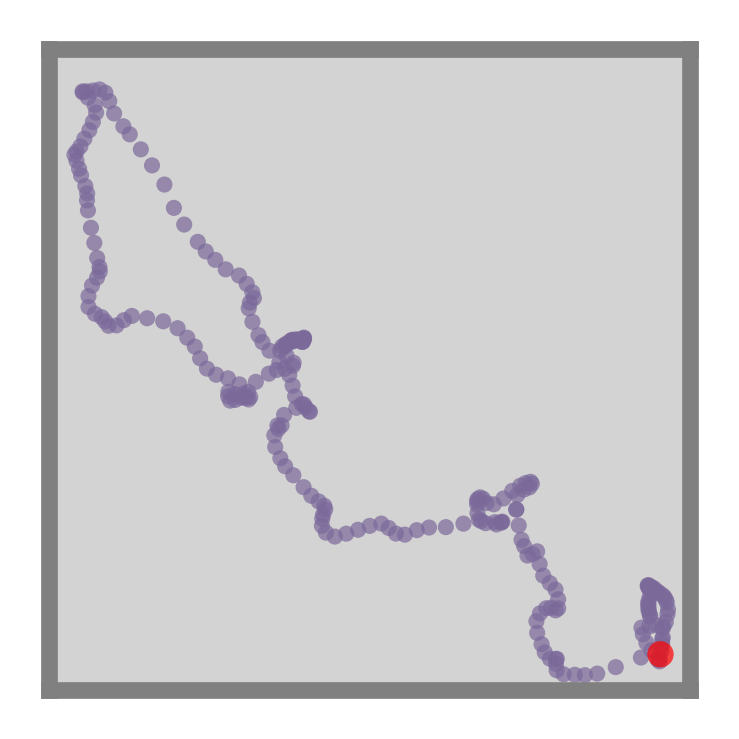

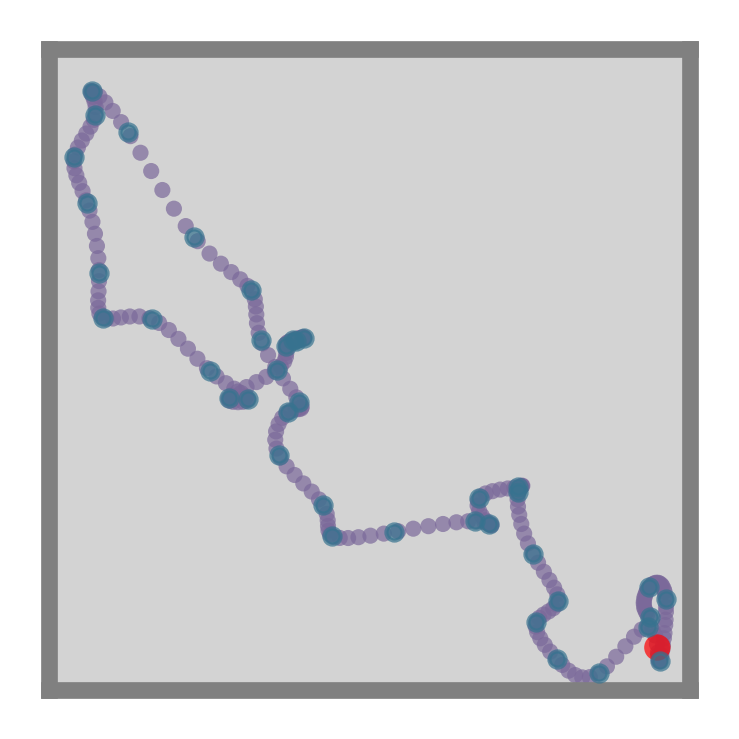

In [45]:
#import data
from scipy import io 
mat = io.loadmat("../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#save_data
pos = np.stack((x,y)).T
np.savez("../data/sargolini.npz",t=t,pos=pos)
#data is 10 mins, we want 10 secs
startid = 100
x = x[startid:startid+int(len(x)/25)]
y = y[startid:startid+int(len(y)/25)]
t = t[startid:startid+int(len(t)/25)]
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x_ds = x[::30]
y_ds = y[::30]
t_ds = t[::30]
#concatenate
pos = np.stack((x,y)).T
pos_ds = np.stack((x_ds,y_ds)).T

Env = Environment()
Ag1 = Agent(params={'Environment':Env})
Ag2 = Agent(params={'Environment':Env})
Ag1.import_trajectory(times=t,positions=pos)
Ag2.import_trajectory(times=t_ds,positions=pos_ds)

for i in tqdm(range(int(t_ds[-1]/Ag2.dt))):
    Ag1.update()
    Ag2.update()

fig, ax = Ag1.plot_trajectory()
tpl.saveFigure(fig,'imported')
fig, ax = Ag2.plot_trajectory()
ax.scatter(x_ds,y_ds,c='C1',s=15,linewidth=1,zorder=11,alpha=0.7)
tpl.saveFigure(fig,'upsampled')

In [6]:
len(x)

1192

### Figure 3b

In [20]:
Env = Environment()
# Env.add_wall(np.array([[0.25,0.5],[0.75,0.5]]))
Ag = Agent(params={'Environment':Env})

Ntest = 1000
PCs = Neurons(
    params={'Agent':Ag,
            'cell_class':'place_cell',
            'n':Ntest,
            'description':'gaussian_threshold',
            'widths':0.4,
            'color':'C1'
            }
)

GCs = Neurons(
    params={'Agent':Ag,
            'cell_class':'grid_cell',
            'n':Ntest,
            'color':'C2'
            }
)

BVCs = Neurons(
    params={'Agent':Ag,
            'cell_class':'boundary_vector_cell',
            'n':Ntest,
            'color':'C3'
            }
)

In [24]:
import time 

motion = []
pc = []
gc = []
bvc = []
matmul = []
inverse = []
 
for i in tqdm(range(400)):
    t0 = time.time()
    Ag.update()
    t1 = time.time()
    motion.append(t1-t0)

    t0 = time.time()
    PCs.update()
    t1 = time.time()
    pc.append(t1-t0)

    t0 = time.time()
    GCs.update()
    t1 = time.time()
    gc.append(t1-t0)

    t0 = time.time()
    BVCs.update()
    t1 = time.time()
    bvc.append(t1-t0)

    a = np.random.normal(size=(Ntest,))
    b = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    c = np.matmul(b,a)
    t1 = time.time()
    matmul.append(t1-t0)

    a = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    b = np.linalg.inv(a)
    t1 = time.time()
    inverse.append(t1-t0)

motion = np.array(motion)
pc = np.array(pc)
gc = np.array(gc)
bvc = np.array(bvc)
matmul = np.array(matmul)
inverse = np.array(inverse)



100%|██████████| 400/400 [00:36<00:00, 10.94it/s]


'../figures/220623/clocktimes_1208'

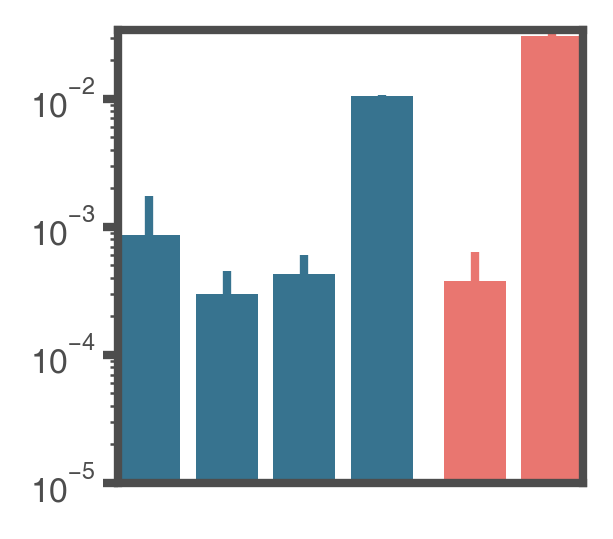

In [25]:
positions = [1,2,3,4,5.2,6.2]
heights = [motion.mean(),pc.mean(),gc.mean(),bvc.mean(),matmul.mean(),inverse.mean()]
uncertainties = [motion.std(),pc.std(),gc.std(),bvc.std(),matmul.std(),inverse.std()]
color = ['C1','C1','C1','C1','C5','C5']

fig, ax = plt.subplots()
ax.bar(positions,heights,color=color,yerr=uncertainties,ecolor=color)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-5)
ax.set_xticks([])
tpl.saveFigure(fig,'clocktimes')


In [26]:
heights[3]/heights[1]

35.130315415406585

In [23]:
import ratinabox

In [24]:
ratinabox.__file__

'/Users/tomgeorge/Documents/RatInABox/scripts/../ratinabox.py'

In [29]:
os.path.join(
                          os.path.join(
                          os.path.abspath(
                          os.path.join(ratinabox.__file__, os.pardir)),"data"),"sargolini.npz")

'/Users/tomgeorge/Documents/RatInABox/data/sargolini.npz'

(<Figure size 900x6600 with 1 Axes>,
 <AxesSubplot:xlabel='Position / m', ylabel='Neurons'>)

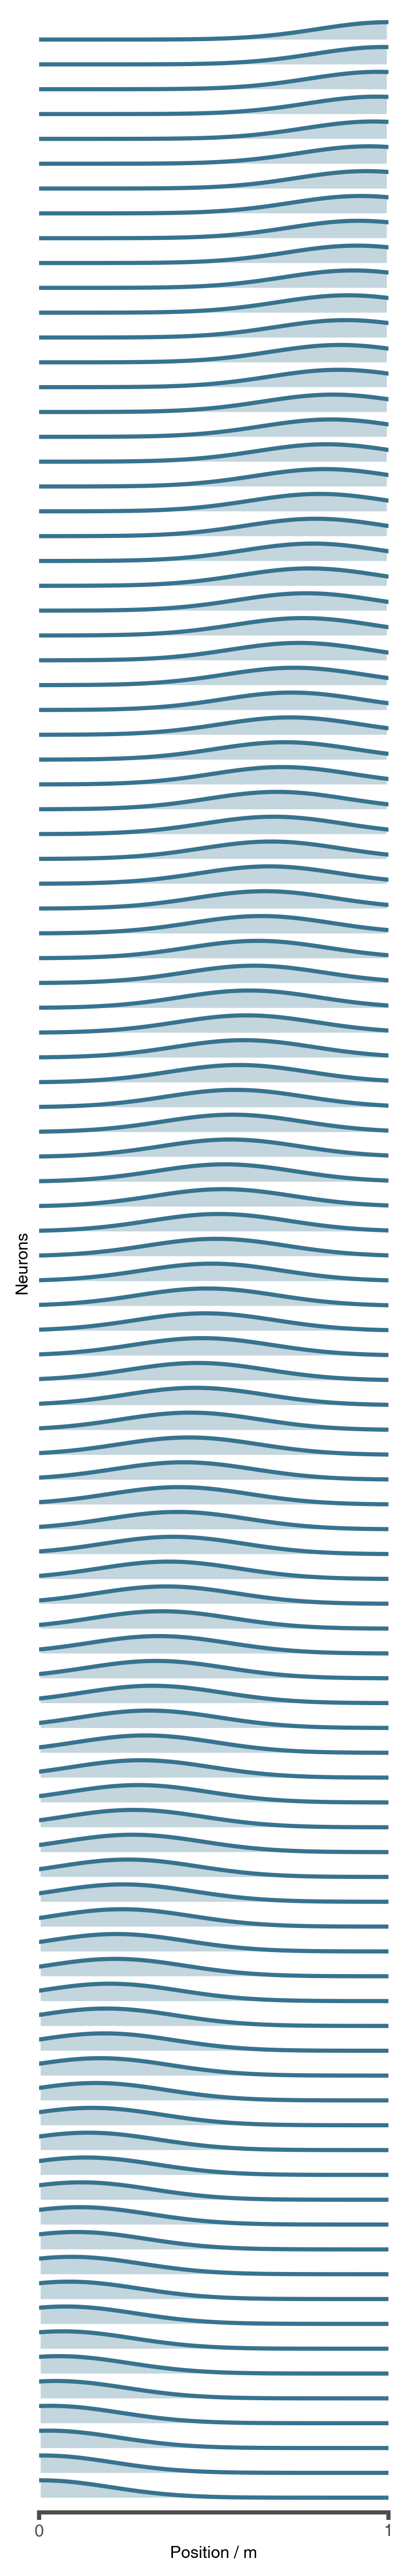

In [12]:
Env = Environment(params={'dimensionality':'1D'})
Ag = Agent(params={'Environment':Env,})
PlaceCells = Neurons(params={'Agent':Ag,
                             'cell_class':'place_cell',
                             'n':100})
PlaceCells.plot_rate_map()

In [ ]:
matplotlib.colors.to_rgb(colo)